<a href="https://colab.research.google.com/github/OleksiiLatypov/DS_HW_1/blob/master/DS_HW_10/DS_HW_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker' , 'Bag', 'Ankle boot']

num_classes = len(class_names)

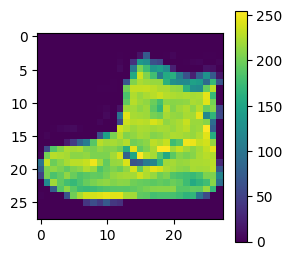

Ankle boot


In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[0]])

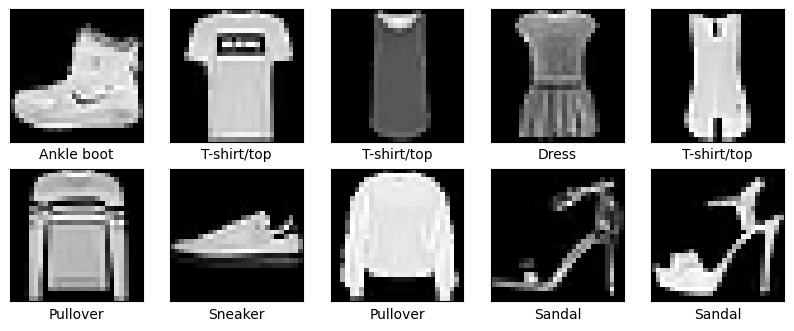

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_names[train_labels[i]])


In [ ]:
def convert_to_tensor(images):
  return images.reshape(images.shape[0], 28, 28, 1)

train_images = convert_to_tensor(train_images)
test_images = convert_to_tensor(test_images)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
def normalization(images):
  return images.astype('float32') / 255.0
train_images = normalization(train_images)
test_images = normalization(test_images)
print(f'Shape of train images: {train_images.shape}')
print(f'Shape of test images: {test_images.shape}')


Shape of train images: (60000, 28, 28, 1)
Shape of test images: (10000, 28, 28, 1)


In [ ]:
# convert the target variable to categorical variable

unique_classes = np.unique(train_labels)
NUM_CLASSES = unique_classes.shape[0]

def to_categorical(labels, num_classes):
  return tf.keras.utils.to_categorical(labels, num_classes)
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') - logs.get('val_accuracy') >= 0.05 and epoch > 10:
      # Stop if threshold is met
      print(f"\nThe difference between train accuracy and validation more than 5% so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
epoch_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, verbose=1, mode='auto', restore_best_weights=False)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',data_format='channels_last', input_shape=(28,28,1)),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),


  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
  ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images,
          train_labels,
          validation_data=(test_images, test_labels),
          batch_size=250,
          epochs=25,
          callbacks=[callbacks, reduce_lr, epoch_callback])

Epoch 1/25
  6/240 [..............................] - ETA: 12s - loss: 1.7413 - accuracy: 0.4973

240/240 [==============================] - 15s 45ms/step - loss: 0.4899 - accuracy: 0.8267 - val_loss: 1.9975 - val_accuracy: 0.2299 - lr: 0.0030
Epoch 2/25
240/240 [==============================] - 10s 43ms/step - loss: 0.2988 - accuracy: 0.8942 - val_loss: 0.4041 - val_accuracy: 0.8556 - lr: 0.0030
Epoch 3/25
240/240 [==============================] - 10s 43ms/step - loss: 0.2523 - accuracy: 0.9089 - val_loss: 0.2552 - val_accuracy: 0.9093 - lr: 0.0030
Epoch 4/25
240/240 [==============================] - 11s 44ms/step - loss: 0.2272 - accuracy: 0.9184 - val_loss: 0.2244 - val_accuracy: 0.9193 - lr: 0.0030
Epoch 5/25
240/240 [==============================] - 11s 45ms/step - loss: 0.2067 - accuracy: 0.9269 - val_loss: 0.2096 - val_accuracy: 0.9270 - lr: 0.0030
Epoch 6/25
240/240 [==============================] - 11s 44ms/step - loss: 0.1869 - accuracy: 0.9333 - val_loss: 0.2134 - val_accuracy: 0.9252 - lr: 0.0030
Epoch 7/25
240/240 [==============================] - 11s 44ms/step -

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.2463 - accuracy: 0.9412


[0.24628545343875885, 0.9412000179290771]

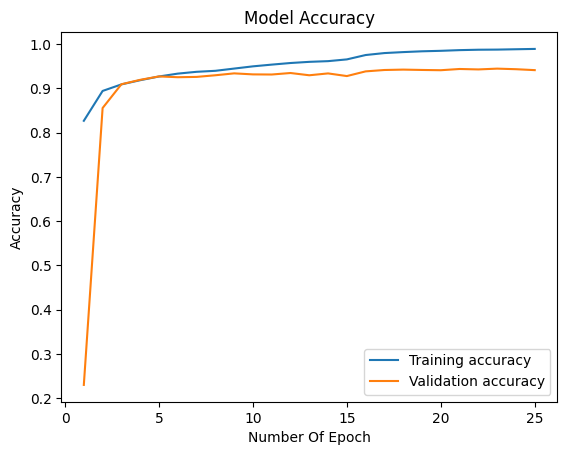

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(list(range(1, len(train_accuracy) + 1)), train_accuracy, label='Training accuracy')
plt.plot(list(range(1, len(val_accuracy) + 1)), val_accuracy, label='Validation accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Number Of Epoch')
plt.ylabel('Accuracy')
plt.show()

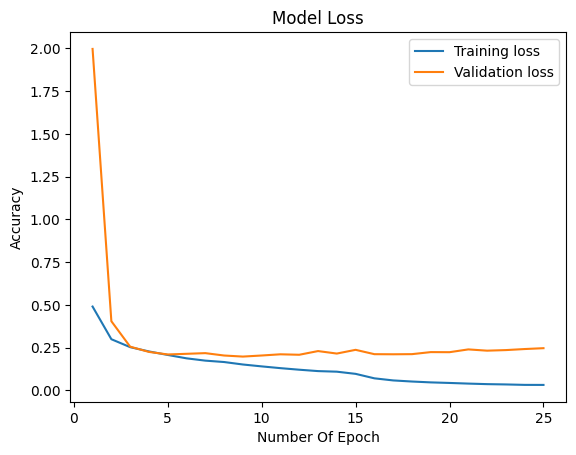

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(list(range(1, len(train_loss) + 1)), train_loss, label='Training loss')
plt.plot(list(range(1, len(val_loss) + 1)), val_loss, label = 'Validation loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Number Of Epoch')
plt.ylabel('Accuracy')
plt.show()

313/313 [==============================] - 1s 3ms/step


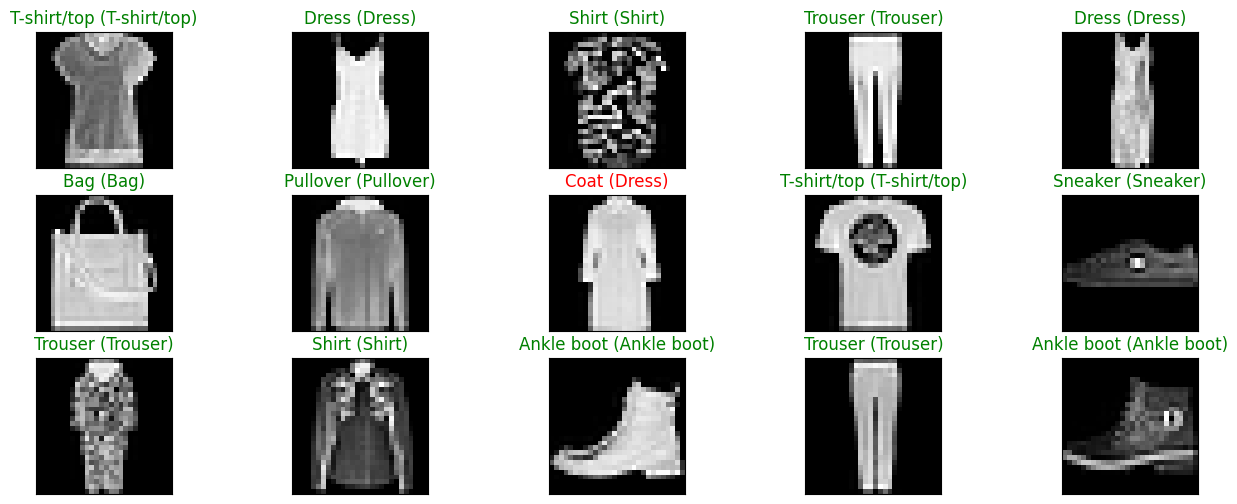

In [ ]:
predictions = model.predict(test_images)

figure = plt.figure(figsize=(16, 6))
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)
for i, index in enumerate(display_images):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[index], cmap='gray')
    predict_index = np.argmax(predictions[index])
    #print(f'{predict_index}: {class_names[predict_index]}')
    true_index = np.argmax(test_labels[index])
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.87      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.93      0.92      1000
       Dress       0.94      0.94      0.94      1000
        Coat       0.89      0.93      0.91      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.83      0.82      0.82      1000
     Sneaker       0.96      0.99      0.98      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.99      0.97      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



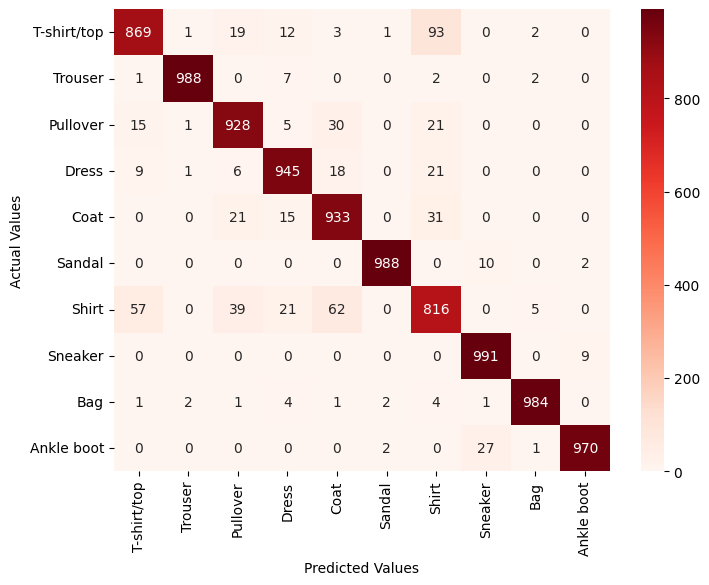

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Як бачимо CNN модель має точніть на 4% вище за FCNN (з попереднього ДЗ). Згідно результатів Classification Report і Confusion Matrix наша нейромережа добре справилася з розпізнаванням усіх зображень одягу. Найбільшу точність вона показала при розпізнаванні зображень Sneaker, Sandal, Trouser, а найменшу для зображень Shirt(згідно Confusion Matrix можна побачити, що найчастіше наша модель помилково передбачає T-shirt/Top замість Shirt).

**With Image Augmenation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

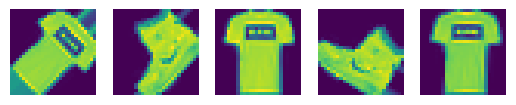

In [ ]:
#check some parametrs of ImageDataGenerator
data_augmentor = ImageDataGenerator(rotation_range=50,
                                    width_shift_range=0.01,
                                    height_shift_range=0.01)

# fit the training data
data_augmentor.fit(train_images)

augment = data_augmentor.flow(train_images[:2], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5, i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

train_batches = generator.flow(train_images, train_labels)
val_batches = generator.flow(test_images, test_labels)

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.003),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history_aug = model.fit(train_batches,
                        epochs=25,
                        batch_size=250,
                        validation_data=val_batches,
                        callbacks=[callbacks, epoch_callback, reduce_lr],
                        use_multiprocessing=True)

Epoch 1/25
1875/1875 [==============================] - 48s 23ms/step - loss: 0.3802 - accuracy: 0.8654 - val_loss: 0.3288 - val_accuracy: 0.8756 - lr: 0.0030
Epoch 2/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3440 - accuracy: 0.8771 - val_loss: 0.2798 - val_accuracy: 0.8944 - lr: 0.0030
Epoch 3/25
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3229 - accuracy: 0.8832 - val_loss: 0.2683 - val_accuracy: 0.9001 - lr: 0.0030
Epoch 4/25
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3120 - accuracy: 0.8880 - val_loss: 0.2693 - val_accuracy: 0.9000 - lr: 0.0030
Epoch 5/25
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3023 - accuracy: 0.8926 - val_loss: 0.2529 - val_accuracy: 0.9055 - lr: 0.0030
Epoch 6/25
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2972 - accuracy: 0.8936 - val_loss: 0.2548 - val_accuracy: 0.9072 - lr: 0.0030
Epoch 7/25
1875/1875 [========================

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1856 - accuracy: 0.9330


[0.18560539186000824, 0.9330000281333923]

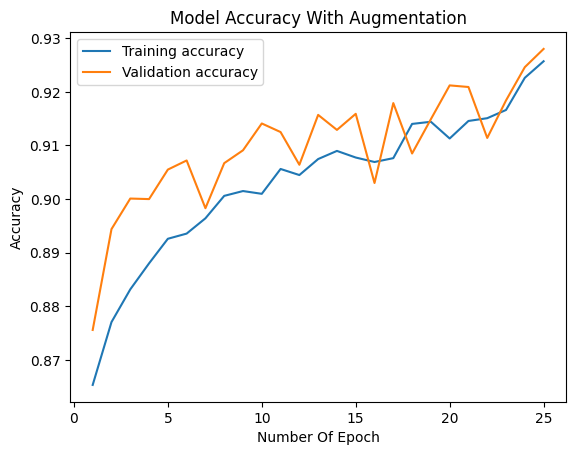

In [ ]:
train_accuracy = history_aug.history['accuracy']
val_accuracy = history_aug.history['val_accuracy']
plt.plot(list(range(1, len(train_accuracy) + 1)), train_accuracy, label='Training accuracy')
plt.plot(list(range(1, len(train_accuracy) + 1)), val_accuracy, label='Validation accuracy')
plt.legend()
plt.title('Model Accuracy With Augmentation')
plt.xlabel('Number Of Epoch')
plt.ylabel('Accuracy')
plt.show()

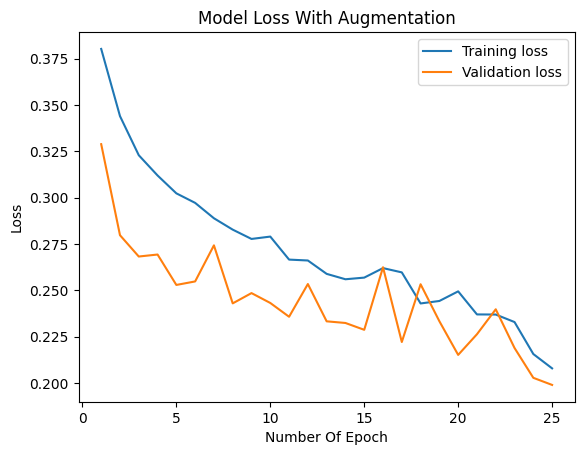

In [ ]:
train_loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
plt.plot(list(range(1, len(train_loss) + 1)), train_loss, label='Training loss')
plt.plot(list(range(1, len(train_loss) + 1)), val_loss, label='Validation loss')
plt.legend()
plt.title('Model Loss With Augmentation')
plt.xlabel('Number Of Epoch')
plt.ylabel('Loss')
plt.show()

313/313 [==============================] - 1s 2ms/step


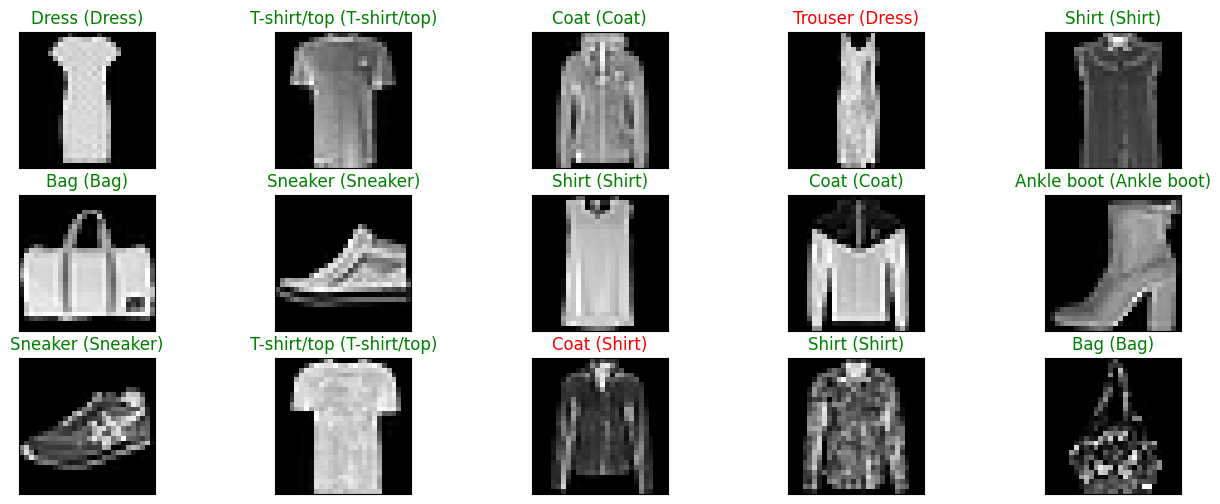

In [ ]:
predictions = model.predict(test_images)

figure = plt.figure(figsize=(16, 6))
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)
for i, index in enumerate(display_images):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[index], cmap='gray')
    predict_index = np.argmax(predictions[index])
    #print(f'{predict_index}: {class_names[predict_index]}')
    true_index = np.argmax(test_labels[index])
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.87      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.94      0.86      0.89      1000
       Dress       0.95      0.92      0.93      1000
        Coat       0.88      0.92      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.76      0.85      0.80      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.99      0.96      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



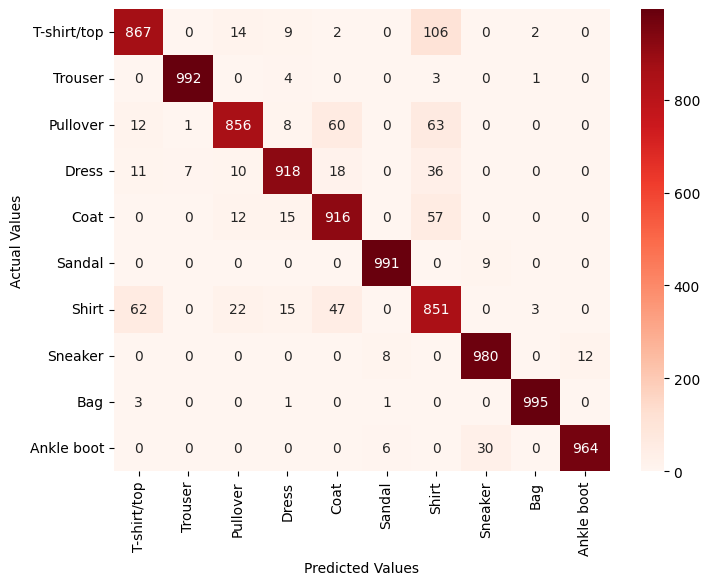

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Як бачимо CNN має точніть на 3% вище за FCNN (з попереднього ДЗ). Згідно результатів Classification Report і Confusion Matrix наша нейромережа добре справилася з розпізнаванням усіх зображень одягу. Найбільшу точність вона показала при розпізнаванні зображень Bag, Sandal, Trouser а найменшу для зображень Shirt. У нашому випадку набір даних Fashion MNISTб, є відносно простим набором даних (він складається із зображень предметів одягу в градаціях сірого з чітко визначеними формами та характеристиками), тому цілком можливо, що CNN без доповнень (Image Augmentation) працює добре завдяки своїй властивій здатності вчитися на даних.